In [1]:
import numpy as np

from scipy import stats
from scipy.spatial import ConvexHull

import itertools

%matplotlib notebook
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from epsie import proposals

In [2]:
def find_intersections(current_position, eigenvector):
    position_vector = np.array([current_position[p] for p in params])
    intersections = list()
    
    for eq in hull.equations:
        normal = eq[:-1]
        dist = -eq[-1]
        
        eigenvector_dot = np.dot(normal, eigenvector)
        if eigenvector_dot != 0:
            intersect = position_vector \
                        + eigenvector * (dist- np.dot(normal, position_vector)) / eigenvector_dot
            intersect = {p: intersect[i] for i, p in enumerate(params)}
            if intersect in prop:
                intersections.append(intersect)
                

    # check for duplicates
    if len(intersections) != 2:
        hashes = list(hash(frozenset(intersect.values())) for intersect in intersections)
        intersections = [intersections[hashes.index(h)] for h in list(set(hashes))]
    
    if len(intersections) != 2:
        raise ValueError("Unexpected behaviour")
        
    return intersections

In [3]:
params = ['x', 'y']
bounds = {'x': (0, 1), 'y': (0, 1)}
prop = proposals.BoundedNormal(params, bounds)

X = np.vstack([i for i in itertools.product(*(bounds[p] for p in params))])
hull = ConvexHull(X)

In [5]:
current_position = {'x': 0.499, 'y': 0.4}
eigenvector = np.array([1.0, 0.5])
# normalise this
eigenvector /= np.sum(eigenvector)

intersections = find_intersections(current_position, eigenvector)

In [6]:
%timeit find_intersections(current_position, eigenvector)

88.3 µs ± 402 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<IPython.core.display.Javascript object>


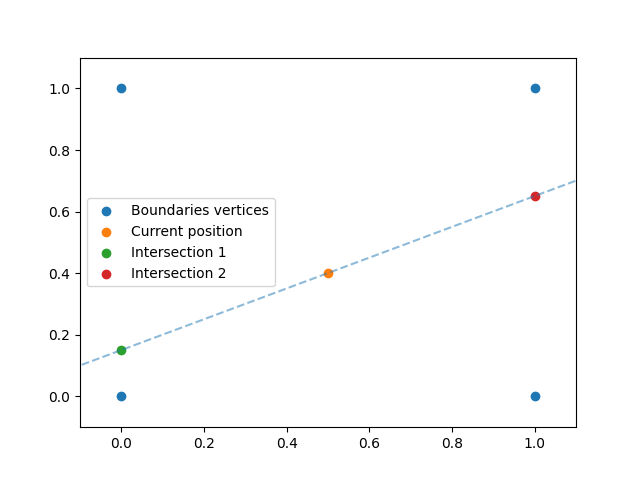

In [7]:
plt.figure()

t = np.linspace(-10, 10, 100)
Y = np.zeros((100, 2))
_x = np.array(list(current_position.values()))
for i in range(100):
    Y[i, :] = _x + eigenvector * t[i]
plt.plot(Y[:, 0], Y[:, 1], alpha=0.5, ls='--')


plt.scatter(X[:, 0], X[:, 1], label='Boundaries vertices')

plt.scatter(current_position['x'], current_position['y'], label='Current position')



for i, intersect in enumerate(intersections):
    plt.scatter(intersect['x'], intersect['y'], label='Intersection {}'.format(i+1))

plt.xlim(bounds['x'][0]-0.1, bounds['x'][1]+0.1)
plt.ylim(bounds['y'][0]-0.1, bounds['y'][1]+0.1)

plt.legend()
plt.show()